# CNN Architectures: Programming Practice

COSC 410: Applied Machine Learning\
Colgate University\
*Prof. Apthorpe*

## Overview

This notebook will give you practice with the following topics:
  1. Creating and training 2D CNNs
  2. Using existing CNN architectures

We will be returning to the CIFAR-10 dataset for the final time. The description of the dataset is here: https://www.cs.toronto.edu/%7Ekriz/cifar.html.

## Part 1. Data Import

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow import keras as ks

import os
import datetime

np.random.seed(0) # set random seeds so everyone gets same results
tf.random.set_seed(1)

cifar10 = ks.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

**Important:** Today, we'll normalize the images as a preprocessing step before the neural network rather than using a `BatchNormalization` layer. The RGB values are in \[0, 255\], so we will divide them by 255 to normalize to \[0, 1\]

In [16]:
train_images = np.divide(train_images, 255)
test_images = np.divide(test_images, 255)

We should check the shape of the data and balance of the classes:

In [17]:
print(train_images.shape)
print(test_images.shape)

print(len(train_labels))
print(len(test_labels))

print(np.unique(train_labels, return_counts=True)[1])
print(np.unique(test_labels, return_counts=True)[1])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
50000
10000
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


This means that each image is 32x32 pixels as expected. We have have 50000 training images and 10000 images (one label each). The last two lines show the number of images of each class (0 to 9). The fact that the classes are balanced means that accuracy is a fine metric to use for this classification problem. The baseline accuracy of a naive "choose-at-random" classifier will be 0.1.  

## Part 2. Creating a CNN

We will start by creating a CNN with the following architecture (except with 32x32x3 input images for CIFAR-10 instead of the 28x28x1 input image shown):

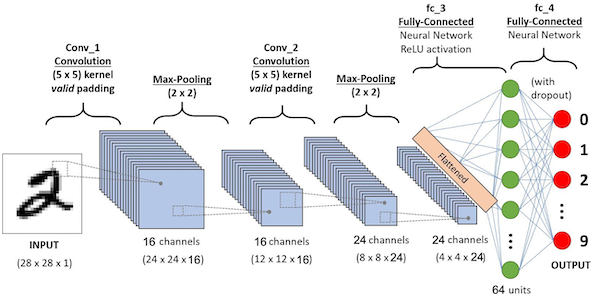

Unlike the FNNs we have used in previous weeks, we do NOT need to flatten the input as we will be performing 2D convolutions and 2D max pooling in the initial series of layers. Instead, we will start the network with an `Input` layer and specify the input shape of the images with the `shape` keyword argument. (Documentation here: https://keras.io/api/layers/core_layers/input/)

In [18]:
# Create sequential model
model = ks.models.Sequential()

# Add input layer
model.add(ks.layers.Input(shape=(32,32,3)))

Now we will add the sequence of convolutional and max pooling layers. The convolutional layers are instances of `Conv2D` (docs here: https://keras.io/api/layers/convolution_layers/convolution2d/), and the pooling layers are instances of `MaxPooling2D` (docs here: https://keras.io/api/layers/pooling_layers/max_pooling2d/)

In [19]:
# Add first convolution and max pool layers
model.add(ks.layers.Conv2D(filters=16, kernel_size=(5,5), padding="valid", strides=(1,1), activation="elu"))
model.add(ks.layers.MaxPooling2D(pool_size=(2,2)))

In [20]:
# Add second convolution and max pool layers
model.add(ks.layers.Conv2D(filters=16, kernel_size=(5,5), padding="valid", strides=(1,1), activation="elu"))
model.add(ks.layers.MaxPooling2D(pool_size=(2,2)))


Finally, we flatten the feature maps and add the feedforward `Dense` layers to the end of the network with dropout.

In [21]:
# Add fully-connected layers
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(64, activation="relu"))
model.add(ks.layers.Dropout(0.1))
model.add(ks.layers.Dense(10, activation="softmax"))


Let's view a summary of the model to make sure we constructed the architecture correctly

In [22]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        6416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

Model compilation and training with `.compile()` and `.fit()` work the same as with FNNs

In [23]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train model
model.fit(train_images, train_labels, batch_size=100, epochs=100, validation_split=0.15)

Epoch 1/100
425/425 [==============================] - 14s 31ms/step - loss: 1.7193 - accuracy: 0.3775 - val_loss: 1.4933 - val_accuracy: 0.4608
Epoch 2/100
425/425 [==============================] - 12s 28ms/step - loss: 1.4179 - accuracy: 0.4893 - val_loss: 1.3212 - val_accuracy: 0.5291
Epoch 3/100
425/425 [==============================] - 12s 28ms/step - loss: 1.2971 - accuracy: 0.5378 - val_loss: 1.2336 - val_accuracy: 0.5692
Epoch 4/100
425/425 [==============================] - 12s 27ms/step - loss: 1.2075 - accuracy: 0.5746 - val_loss: 1.1888 - val_accuracy: 0.5844
Epoch 5/100
425/425 [==============================] - 11s 26ms/step - loss: 1.1478 - accuracy: 0.5924 - val_loss: 1.1427 - val_accuracy: 0.5992
Epoch 6/100
425/425 [==============================] - 11s 26ms/step - loss: 1.1014 - accuracy: 0.6109 - val_loss: 1.1215 - val_accuracy: 0.6053
Epoch 7/100
425/425 [==============================] - 11s 27ms/step - loss: 1.0599 - accuracy: 0.6275 - val_loss: 1.0785 - val_ac

KeyboardInterrupt: 

## Part 3. CNN & Pooling Hyperparameters

The `Conv2D` and `MaxPooling2D` layers provide several keyword arguments for specifying hyperparameters. The most important are described below:

**Conv2D**
  *   `filters` *(required)*: Number of filters to include in the layer.
  *   `kernel_size` *(required)*: Size of the filters as a 2-element tuple. For example, 3x3 filters would be entered as `(3, 3)`.
  *   `strides`:  Stride length along the x and y axis as a 2-element tuple. The default is `(1,1)`
  *   `padding`:  Padding strategy. The options are `"valid"` (default) and `"same"`
  *   `activation`: Activation function to apply to output feature maps. The default (`None`) is equivalent to `"linear"`. Other options include `"relu"`, `"sigmoid"`, `"elu"`, etc. 
  *   `kernel_regularizer`: Regularization term to include in cost function to limit growth of filter weights. Default is `None` (no regularization). `l1`, `l2`, `l1_l2`, and other options here: https://keras.io/api/layers/regularizers/

**MaxPooling2D**
  *  `pool_size` *(required)*: Size of the pooling filter as a 2-element tuple. For example, 2x2 pooling (halving the output size on both dimensions) would be entered as `(2, 2)`

## Part 4. Using Existing Network Architectures

There are many available CNN architectures for different problems available in the `keras.applications` module: https://keras.io/api/applications/. 

The following cell uses a portion of the VGG-16 network with pre-trained weights from the ImageNet dataset: http://www.image-net.org/about. 

This code was copied directly from the GitHub repository https://github.com/mjiansun/cifar10-vgg16 with edits for clarity, to make it consistent with the rest of this notebook, and so it works with the most recent versions of Keras and Tensorflow. 

In [25]:
# set random seeds
np.random.seed(0) 
tf.random.set_seed(1)

# Reload data just to be safe
cifar10 = ks.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = np.divide(train_images, 255)
test_images = np.divide(test_images, 255)

# load base VGG16 network architecture with pre-trained weights
vgg16 = ks.applications.VGG16(
    include_top=False, # Do not include the default FNN layers at the end of the network, we will add our own
    weights="imagenet", # use pre-trained starting weights from the ImageNet dataset
    input_shape=(32, 32, 3),
)

# Extract the last layer from third block of vgg16 model --> the full vgg16 network is overkill for CIFAR-10
last = vgg16.get_layer('block3_pool').output

# Add classification layers on top of it
x = ks.layers.Flatten()(last)
x = ks.layers.Dense(256, activation='relu')(x)
x = ks.layers.Dropout(0.5)(x)
pred = ks.layers.Dense(10, activation='softmax')(x)

# create model object
model = ks.Model(vgg16.input, pred)

# compile the model with a SGD/momentum optimizer and a very slow learning rate.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=ks.optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])


# create image generator for training set augmentation
train_datagen = ks.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_datagen.fit(train_images)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# create image generator for test (validation) set
val_datagen = ks.preprocessing.image.ImageDataGenerator()
validation_generator = val_datagen.flow(test_images, test_labels, batch_size=32)

# fit the model
model.fit(
    train_generator,
    steps_per_epoch=1562,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=312)

58900480/58889256 [==============================] - 5s 0us/step


C:\Python310\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
 394/1562 [======>.......................] - ETA: 3:17 - loss: 2.3089 - accuracy: 0.0780

KeyboardInterrupt: 

Unfortunately, this network (like many deep CNNs) takes a long time to train, especially on a laptop. I have therefore copied the output reported by the designers of the network (https://github.com/mjiansun/cifar10-vgg16). The hardware used by the designers took only ~60 seconds per epoch.

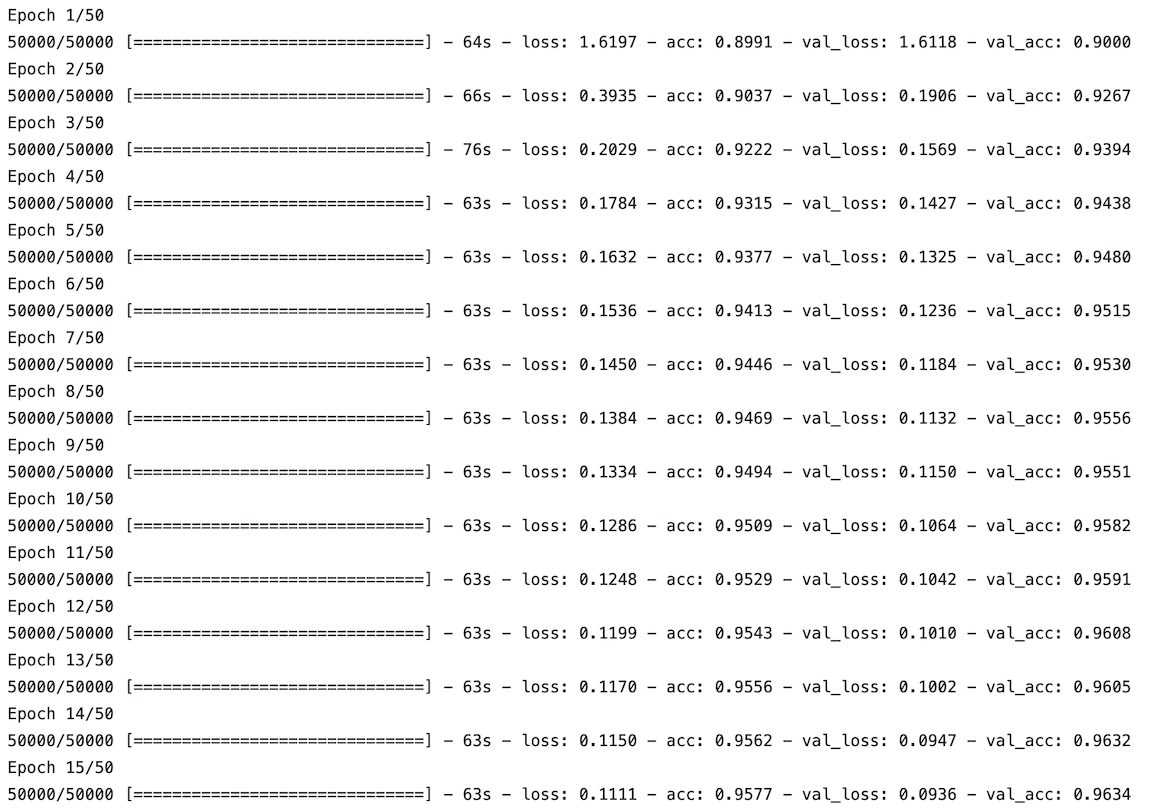

What an improvement over our original attempts at CIFAR-10!!

Let's inspect the final model:

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     